# Cleaning and comparing order times


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import time
import missingno
import math

In [2]:
# load the csv into a dataframe
df = pd.read_csv("Orders - Time Tracker.csv", sep=";")
df

,Time Taken,No. of Pieces,Order Type,Start Time,End Time,Gift Order(X/?),Time Taken.1
0,37205.0,4.0,P,08:55,9:55:00 AM,False,1:00:00
1,37249.0,1.0,L,4:16:00 PM,4:35:00 PM,False,0:19:00
2,37178.0,1.0,L,9:10:00 AM,9:30:00 AM,False,0:20:00
3,37273.0,1.0,L,8:30:00 AM,8:50:00 AM,False,0:20:00
4,37269.0,1.0,P,3:25:00 PM,4:10:00 PM,False,0:45:00
...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop columns that add no useful data
df.drop("Time Taken", axis=1, inplace=True)

In [4]:
#Drop extra fully empty rows included in the csv
df = df.dropna(how='all')

<Axes: >

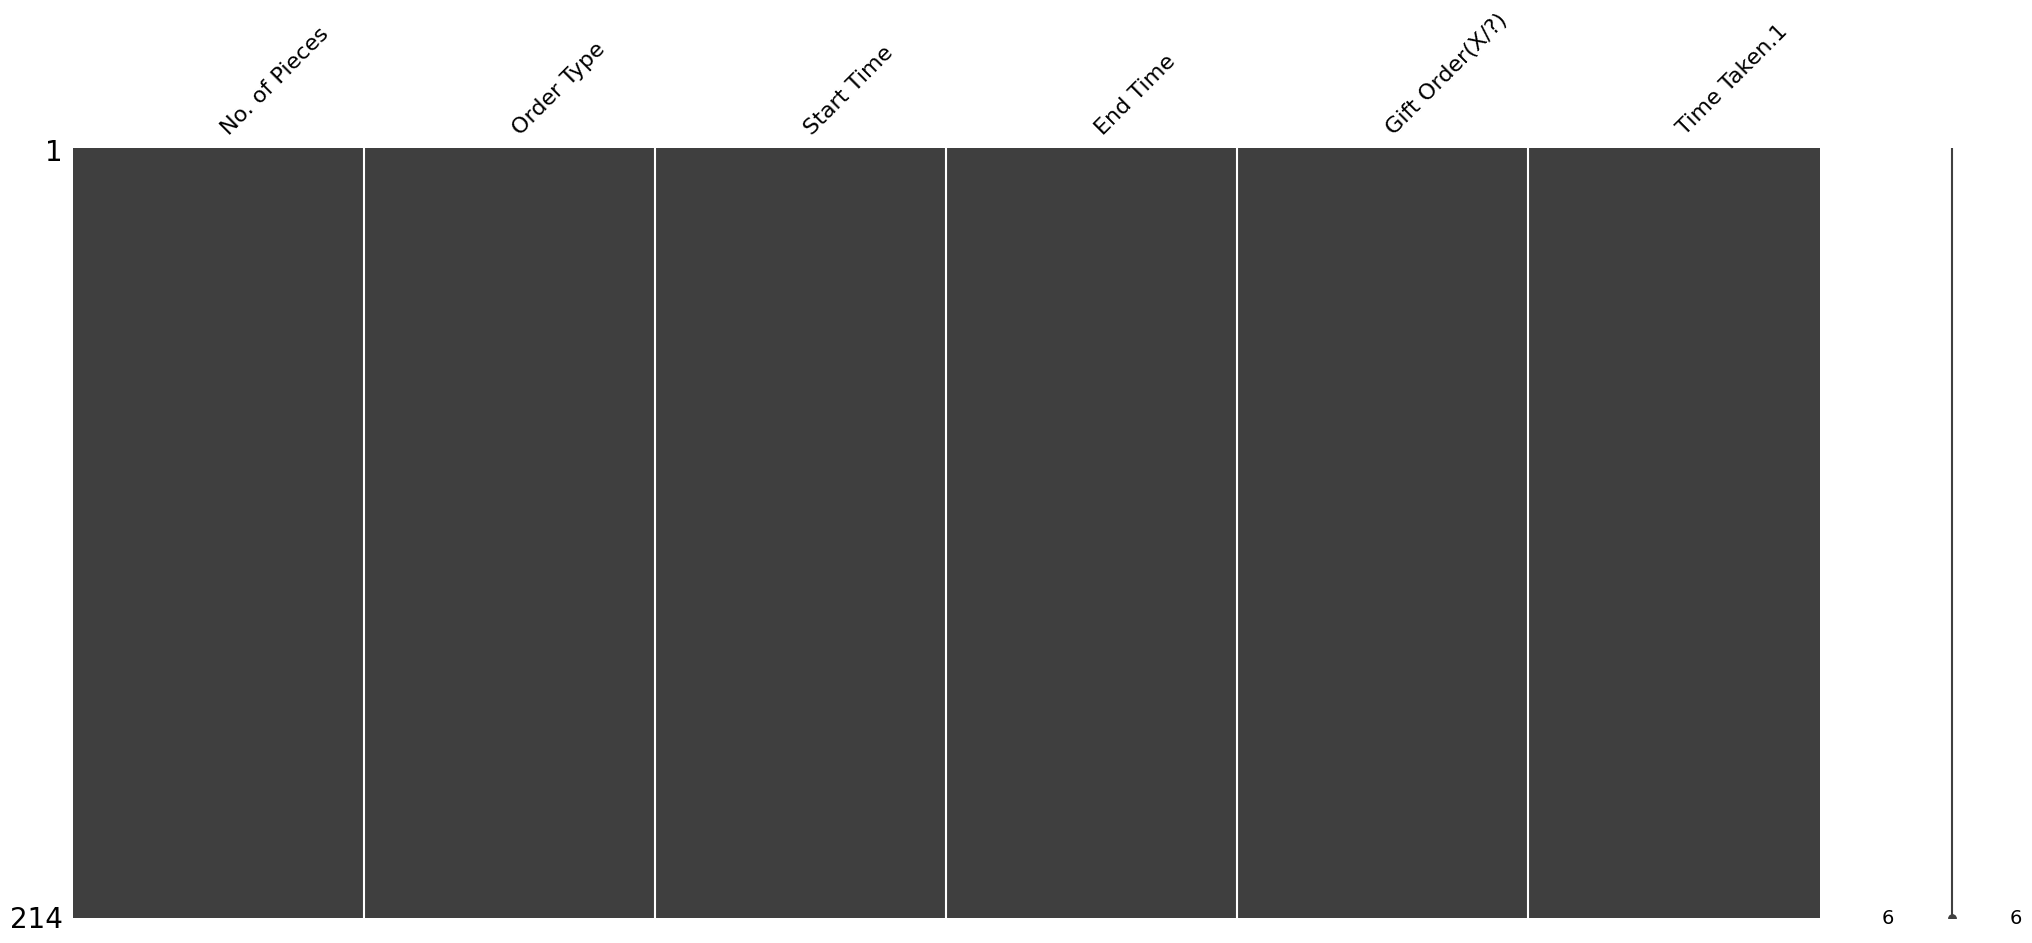

In [5]:
# Visualise missing data
missingno.matrix(df)

In [6]:
# Check shape to compare to original data set
df.shape

(214, 6)

In [7]:
# Renaming columns for ease of use
df = df.rename(columns={"No. of Pieces":"Pieces", 
                        "Order Type":"Type", 
                        "Start Time":"Start", 
                        "End Time":"End", 
                        "Gift Order(X/?)":"Gift", 
                        "Time Taken.1":"Time"})

In [8]:
# Checking Data types
df.dtypes

Pieces    float64
Type       object
Start      object
End        object
Gift       object
Time       object
dtype: object

In [9]:
# Ensuring data types are usable
df["Pieces"].astype(int)

0      4
1      1
2      1
3      1
4      1
      ..
209    1
210    1
211    1
212    1
213    1
Name: Pieces, Length: 214, dtype: int64

In [10]:
# Turning Gift into Boolean
df["Gift"] = df["Gift"].astype(bool)
df.dtypes
df["Gift"].value_counts()

Gift
False    205
True       9
Name: count, dtype: int64

In [11]:
# Checking the time column for irregularities
df["Time"].unique()

array(['1:00:00', '0:19:00', '0:20:00', '0:45:00', '0:10:00', '0:13:00',
       '0:15:00', '0:30:00', '0:05:00', '0:28:00', '0:40:00', '0:17:00',
       '0:25:00', '0:38:00', '1:03:00',
       '###############################################################################################################################################################################################################################################################',
       '0:04:00', '0:09:00', '0:07:00', '1:15:00', '0:12:00', '0:03:00',
       '1:05:00', '1:30:00', '0:33:00', '0:22:00', '0:26:00', '0:18:00',
       '0:29:00', '0:49:00', '0:24:00', '0:27:00', '0:14:00', '1:24:00',
       '0:06:00', '0:39:00', '0:11:00', '0:58:00', '1:41:00', '0:46:00',
       '1:26:00', '1:54:00', '0:21:00', '0:41:00', '0:35:00', '0:00:00',
       '2:16:00', '1:21:00', '0:44:00', '0:08:00', '1:08:00', '2:17:00',
       '0:01:00', '0:23:00', '2:00:00', '0:55:00', '1:12:00', '0:32:00',
       '0:34:00', '0:16:00', '0:52:00

In [12]:
# Checking the start column for irregularities
df["Start"].unique()

array(['08:55', '4:16:00 PM', '9:10:00 AM', '8:30:00 AM', '3:25:00 PM',
       '8:15:00 AM', '8:42:00 AM', '4:55:00 PM', '10:15:00 AM',
       '4:32:00 PM', '10:05:00 AM', '8:35:00 AM', '8:47:00 AM',
       '9:25:00 AM', '3:40:00 PM', '8:43:00 AM', '9:05:00 AM',
       '3:07:00 PM', '8:20:00 AM', '11:15:00 AM', '3:55:00 PM',
       '9:45:00 AM', '9:30:00 AM', '10:45:00 AM', '4:15:00 PM',
       '8:25:00 AM', '10:00:00 AM', '11:05:00 AM', '8:45:00 AM',
       '9:36:00 AM', '7:43:00 AM', '4:00:00 PM', '9:55:00 AM',
       '9:15:00 AM', '8:00:00 AM', '2:47:00 PM', '3:30:00 PM',
       '7:25:00 AM', '7:28:00 AM', '7:40:00 AM', '7:45:00 AM',
       '8:10:00 AM', '9:59:00 AM', '11:52:00 AM', '8:26:00 AM',
       '7:38:00 AM', '7:41:00 AM', '9:40:00 AM', '8:33:00 AM',
       '12:31:00 PM', '2:01:00 PM', '2:14:00 PM', '2:17:00 PM',
       '2:43:00 PM', '8:29:00 AM', '8:52:00 AM', '10:30:00 AM',
       '11:13:00 AM', '11:40:00 AM', '12:40:00 PM', '1:29:00 PM',
       '4:29:00 PM', '8:55:00 AM',

In [13]:
# Checking the end column for irregularities
df["End"].unique()

array(['9:55:00 AM', '4:35:00 PM', '9:30:00 AM', '8:50:00 AM',
       '4:10:00 PM', '8:25:00 AM', '8:55:00 AM', '8:45:00 AM', '17:05',
       '9:00:00 AM', '10:20:00 AM', '5:00:00 PM', '10:45:00 AM',
       '8:40:00 AM', '9:15:00 AM', '9:45:00 AM', '4:00:00 PM',
       '3:45:00 PM', '11:20:00 AM', '9:35:00 AM', '11:05:00 AM',
       '4:45:00 PM', '9:05:00 AM', '10:30:00 AM', '11:35:00 AM',
       '8:49:00 AM', '7:50:00 AM', '10:12:00 AM', '9:48:00 AM',
       '10:00:00 AM', '4:30:00 PM', '4:20:00 PM', '3:20:00 PM',
       '8:05:00 AM', '8:10:00 AM', '4:15:00 PM', '8:30:00 AM',
       '10:25:00 AM', '12:10:00 PM', '8:00:00 AM', '10:18:00 AM',
       '8:57:00 AM', '4:42:00 PM', '9:20:00 AM', '12:34:00 PM',
       '2:06:00 PM', '2:18:00 PM', '2:31:00 PM', '4:07:00 PM',
       '8:43:00 AM', '8:58:00 AM', '10:50:00 AM', '11:30:00 AM',
       '12:19:00 PM', '12:50:00 PM', '1:35:00 PM', '4:40:00 PM',
       '9:21:00 AM', '10:06:00 AM', '10:51:00 AM', '4:04:00 PM',
       '4:16:00 PM', '4:37:0

As we can see the Start and End columns seem to be accurate but there are some strange things going on with the Time column

In [14]:
# Finding irregular time stamps
mask = df["Time"].str.contains("#")
df[mask]

,Pieces,Type,Start,End,Gift,Time
24,1.0,P,9:45:00 AM,9:15:00 AM,False,##############################################...
108,1.0,P,4:21:00 PM,2:53:00 PM,False,##############################################...


As we can see index 24 and 108 have start times later than their end times. It is unlikely that packaging lasted overnight and this seems to be a simple error in data entry. Lets change the Start and End columns to datetime and flip the anomalous rows Start end End times.

In [15]:
# Changing start and end into datetimes
df["Start"] = pd.to_datetime(df["Start"], errors="coerce")
df["End"] = pd.to_datetime(df["End"], errors="coerce")

C:\Users\Paulo\AppData\Local\Temp\ipykernel_37684\1388697011.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Start"] = pd.to_datetime(df["Start"], errors="coerce")
C:\Users\Paulo\AppData\Local\Temp\ipykernel_37684\1388697011.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["End"] = pd.to_datetime(df["End"], errors="coerce")


In [16]:
df

,Pieces,Type,Start,End,Gift,Time
0,4.0,P,2025-11-17 08:55:00,2025-11-17 09:55:00,False,1:00:00
1,1.0,L,2025-11-17 16:16:00,2025-11-17 16:35:00,False,0:19:00
2,1.0,L,2025-11-17 09:10:00,2025-11-17 09:30:00,False,0:20:00
3,1.0,L,2025-11-17 08:30:00,2025-11-17 08:50:00,False,0:20:00
4,1.0,P,2025-11-17 15:25:00,2025-11-17 16:10:00,False,0:45:00
...,...,...,...,...,...,...
209,1.0,P/L,2025-11-17 08:33:00,2025-11-17 09:00:00,False,0:27:00
210,1.0,P,2025-11-17 08:18:00,2025-11-17 08:50:00,False,0:32:00
211,1.0,P,2025-11-17 14:51:00,2025-11-17 15:20:00,False,0:29:00
212,1.0,P,2025-11-17 13:36:00,2025-11-17 14:00:00,False,0:24:00


In [17]:

"""# Automated but slower
for i in range(df.shape[0]): # for each row
    if df.loc[i, "Start"] > df.loc[i, "End"]:
        time1 = df.loc[i, "Start"]
        time2 = df.loc[i, "End"]
        df.loc[i, "End"] = time1
        df.loc[i, "Start"] = time2
"""
# Switching rows where time started is greater than time ended
# Vectorised is fastest
new_mask = df["Start"] > df["End"]
df.loc[new_mask, ["Start","End"]] = df.loc[new_mask, ["End","Start"]].values
df[new_mask]

,Pieces,Type,Start,End,Gift,Time
24,1.0,P,2025-11-17 09:15:00,2025-11-17 09:45:00,False,##############################################...
108,1.0,P,2025-11-17 14:53:00,2025-11-17 16:21:00,False,##############################################...


In [18]:
# Putting any applicable string for datetime conversion into missing rows
df.loc[mask, "Time"] = "00:00:00"

# Converting the strings to datetime
pd.to_datetime(df.loc[mask, "Time"])
# Changing all Time entries to a timedelta for comparison
pd.to_timedelta(df["Time"])
df[mask]

C:\Users\Paulo\AppData\Local\Temp\ipykernel_37684\595204758.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df.loc[mask, "Time"])


,Pieces,Type,Start,End,Gift,Time
24,1.0,P,2025-11-17 09:15:00,2025-11-17 09:45:00,False,00:00:00
108,1.0,P,2025-11-17 14:53:00,2025-11-17 16:21:00,False,00:00:00


In [19]:
# Calculating Time taken based on start and end times
df["Calc Time"] = df["End"]-df["Start"]

df[mask]

,Pieces,Type,Start,End,Gift,Time,Calc Time
24,1.0,P,2025-11-17 09:15:00,2025-11-17 09:45:00,False,00:00:00,0 days 00:30:00
108,1.0,P,2025-11-17 14:53:00,2025-11-17 16:21:00,False,00:00:00,0 days 01:28:00


In [20]:
# Comparing Time columns to see if any errors existed
mask_diff = df["Time"] != df["Calc Time"]
mask_diff.value_counts()
# the 2 errors seen below are the imputed times

False    212
True       2
Name: count, dtype: int64

can drop Time since its useless now, 

In [21]:
# Dropping Time column
df = df.drop(columns= "Time", axis=1)

In [22]:
# Calculating time in Minutes
df["Calc Time"] = df["Calc Time"].dt.total_seconds()/60

In [23]:
# renaming Calc Time to time in minutes
df.rename(columns={"Calc Time":"Time(m)"}, inplace=True)

In [24]:
# Checking if all pieces integers are positive
df["Pieces"].value_counts()

Pieces
1.0    188
2.0     18
4.0      3
5.0      3
3.0      2
Name: count, dtype: int64

In [25]:
# changing Types to uppercase strings so that they can be encoded
df["Type"] = df["Type"].str.upper()

In [26]:
# Checking unique combinations to make sure all cases are handled
df["Type"].value_counts()


Type
P      121
L       33
C       32
P/L     19
PL       8
INT      1
Name: count, dtype: int64

In [27]:
# Separating Type into 4 rows to be used in further analysis
df["P"] = df["Type"].str.contains("P", na=False)
df["L"] = df["Type"].str.contains("L", na=False)
df["C"] = df["Type"].str.contains("C", na=False)
df["INT"] = df["Type"].str.contains("INT", na=False)

In [28]:
df

,Pieces,Type,Start,End,Gift,Time(m),P,L,C,INT
0,4.0,P,2025-11-17 08:55:00,2025-11-17 09:55:00,False,60.0,True,False,False,False
1,1.0,L,2025-11-17 16:16:00,2025-11-17 16:35:00,False,19.0,False,True,False,False
2,1.0,L,2025-11-17 09:10:00,2025-11-17 09:30:00,False,20.0,False,True,False,False
3,1.0,L,2025-11-17 08:30:00,2025-11-17 08:50:00,False,20.0,False,True,False,False
4,1.0,P,2025-11-17 15:25:00,2025-11-17 16:10:00,False,45.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,1.0,P/L,2025-11-17 08:33:00,2025-11-17 09:00:00,False,27.0,True,True,False,False
210,1.0,P,2025-11-17 08:18:00,2025-11-17 08:50:00,False,32.0,True,False,False,False
211,1.0,P,2025-11-17 14:51:00,2025-11-17 15:20:00,False,29.0,True,False,False,False
212,1.0,P,2025-11-17 13:36:00,2025-11-17 14:00:00,False,24.0,True,False,False,False


In [29]:
# Using datetime module to check if packing occurred in the morning or the afternoon
ToD = df["Start"].dt.time < time(12,0,0)
df[ToD]

,Pieces,Type,Start,End,Gift,Time(m),P,L,C,INT
0,4.0,P,2025-11-17 08:55:00,2025-11-17 09:55:00,False,60.0,True,False,False,False
2,1.0,L,2025-11-17 09:10:00,2025-11-17 09:30:00,False,20.0,False,True,False,False
3,1.0,L,2025-11-17 08:30:00,2025-11-17 08:50:00,False,20.0,False,True,False,False
5,2.0,C,2025-11-17 08:15:00,2025-11-17 08:25:00,False,10.0,False,False,True,False
6,1.0,P,2025-11-17 08:42:00,2025-11-17 08:55:00,False,13.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
207,1.0,P,2025-11-17 08:04:00,2025-11-17 08:30:00,False,26.0,True,False,False,False
208,1.0,P/L,2025-11-17 08:18:00,2025-11-17 08:55:00,False,37.0,True,True,False,False
209,1.0,P/L,2025-11-17 08:33:00,2025-11-17 09:00:00,False,27.0,True,True,False,False
210,1.0,P,2025-11-17 08:18:00,2025-11-17 08:50:00,False,32.0,True,False,False,False


In [30]:
# Morning packs set to true while afternoons set to False
df["Morning"] = False
df.loc[ToD, "Morning"] = True

In [31]:
df

,Pieces,Type,Start,End,Gift,Time(m),P,L,C,INT,Morning
0,4.0,P,2025-11-17 08:55:00,2025-11-17 09:55:00,False,60.0,True,False,False,False,True
1,1.0,L,2025-11-17 16:16:00,2025-11-17 16:35:00,False,19.0,False,True,False,False,False
2,1.0,L,2025-11-17 09:10:00,2025-11-17 09:30:00,False,20.0,False,True,False,False,True
3,1.0,L,2025-11-17 08:30:00,2025-11-17 08:50:00,False,20.0,False,True,False,False,True
4,1.0,P,2025-11-17 15:25:00,2025-11-17 16:10:00,False,45.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
209,1.0,P/L,2025-11-17 08:33:00,2025-11-17 09:00:00,False,27.0,True,True,False,False,True
210,1.0,P,2025-11-17 08:18:00,2025-11-17 08:50:00,False,32.0,True,False,False,False,True
211,1.0,P,2025-11-17 14:51:00,2025-11-17 15:20:00,False,29.0,True,False,False,False,False
212,1.0,P,2025-11-17 13:36:00,2025-11-17 14:00:00,False,24.0,True,False,False,False,False


### Now lets begin to explore the relationships between these features.

##### First some basic statistics:

In [36]:
# Average packing time per piece
mean_time = df["Time(m)"].mean()
mean_pieces = df["Pieces"].mean()

median_time = df["Time(m)"].median()
median_pieces = df["Pieces"].median()


print(f"Mean time for each order: {round(mean_time, 2)} minutes\nMean no. of pieces: {round(mean_pieces, 1)}\nMost common time for orders: {median_time} minutes\nMost common no. of pieces per order: {median_pieces}")

Mean time for each order: 30.13 minutes
Mean no. of pieces: 1.2
Most common time for orders: 26.0 minutes
Most common no. of pieces per order: 1.0


In [ ]:
# No of each order type
